In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.optimize as opt

In [2]:
path = 'ex2data2.txt'
data = pd.read_csv(path, header=None,names=['Test 1', 'Test 2', 'Accepted'])

Text(0, 0.5, 'Test 2 Score')

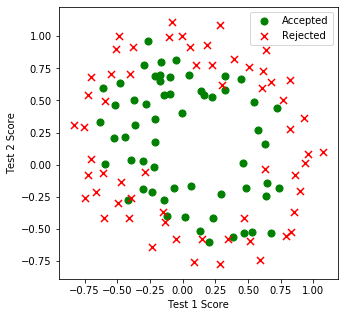

In [3]:
positive = data[data['Accepted'].isin([1])]
negative = data[data['Accepted'].isin([0])]

fig, ax = plt.subplots(figsize=(5,5))
ax.scatter(positive['Test 1'], positive['Test 2'],
s=50, c='g', marker='o', label='Accepted')
ax.scatter(negative['Test 1'],  negative['Test 2'],
s=50, c='r', marker='x', label='Rejected')
ax.legend()
ax.set_xlabel('Test 1 Score')
ax.set_ylabel('Test 2 Score')

In [4]:
x1 = data['Test 1']
x2 = data['Test 2']

data.insert(3, 'Ones', 1) # adding x0

In [5]:
degree = 5
'''
x1 + x1^2 + x1x2 + x1^3 + x1^2 x2 + x1 x2^2 + x1^4 + x1^3 x2 + x1^2 x2^2 + x1 x2^3
F10 = x1
F20 = x1^2
F21 = x1 x2
F30 = x1^3
F31 = x1^2 x2
F32 = x1 x2^2
F40 = x1^4
F41 = x1^3 x2
F42 = x1^2 x2^2
F43 = x1 x2^3
'''
for i in range(1, degree): # 1,2,3,4
    for j in range(0, i): # 0 , 1 , 2 ,2
        data['F' + str(i) + str(j)] = np.power(x1, i-j) * np.power(x2, j) # i=3 , j=2

In [6]:
data.drop('Test 1', axis=1, inplace=True)
data.drop('Test 2', axis=1, inplace=True)
print('data \n' , data.head(10))

data 
    Accepted  Ones       F10       F20       F21       F30       F31       F32  \
0         1     1  0.051267  0.002628  0.035864  0.000135  0.001839  0.025089   
1         1     1 -0.092742  0.008601 -0.063523 -0.000798  0.005891 -0.043509   
2         1     1 -0.213710  0.045672 -0.147941 -0.009761  0.031616 -0.102412   
3         1     1 -0.375000  0.140625 -0.188321 -0.052734  0.070620 -0.094573   
4         1     1 -0.513250  0.263426 -0.238990 -0.135203  0.122661 -0.111283   
5         1     1 -0.524770  0.275384 -0.110097 -0.144513  0.057775 -0.023098   
6         1     1 -0.398040  0.158436 -0.013675 -0.063064  0.005443 -0.000470   
7         1     1 -0.305880  0.093563  0.058805 -0.028619 -0.017987 -0.011305   
8         1     1  0.016705  0.000279 -0.006753  0.000005 -0.000113  0.002730   
9         1     1  0.131910  0.017400 -0.067787  0.002295 -0.008942  0.034835   

            F40       F41       F42       F43  
0  6.907989e-06  0.000094  0.001286  0.017551  
1  7.

In [7]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))


def costReg(theta, X, y, lr ):
    theta = np.matrix(theta)
    X = np.matrix(X)
    y = np.matrix(y)
    first = np.multiply(-y, np.log(sigmoid(X * theta.T)))
    second = np.multiply((1 - y), np.log(1 - sigmoid(X * theta.T)))
    reg = (lr / 2 * len(X)) * np.sum(np.power(theta[:,1:theta.shape[1]], 2))
    return np.sum(first - second) / (len(X)) + reg


def gradientReg(theta, X, y, learningRate):
    theta = np.matrix(theta)
    X = np.matrix(X)
    y = np.matrix(y)
    parameters = int(theta.ravel().shape[1])
    grad = np.zeros(parameters)
    error = sigmoid(X * theta.T) - y
    for i in range(parameters):
        term = np.multiply(error, X[:,i])
        if (i == 0):
          grad[i] = np.sum(term) / len(X)
        else:
          grad[i] =(np.sum(term)/len(X))+((learningRate/len(X))*theta[:,i])
    return grad

In [8]:
cols = data.shape[1]

X2 = data.iloc[:,1:cols]
y2 = data.iloc[:,0:1]

X2 = np.array(X2.values)
y2 = np.array(y2.values)
theta2 = np.zeros(X2.shape[1])


learningRate = 0.00001
rcost = costReg(theta2, X2, y2, learningRate)
print('regularized cost = ' , rcost)
result = opt.fmin_tnc(func=costReg, x0=theta2, fprime=gradientReg,
args=(X2, y2, learningRate))
print( 'result = ' , result )

regularized cost =  0.6931471805599454
result =  (array([ 0.82012272,  0.65301761, -1.29009635, -2.4832717 ,  1.32635419,
        0.58250916, -1.98527681, -3.39873404,  0.60749921, -5.8667162 ,
        1.71118603]), 91, 1)


In [9]:
def predict(theta, X):
    probability = sigmoid(X * theta.T)
    return [1 if x >= 0.5 else 0 for x in probability]

theta_min = np.matrix(result[0])
predictions = predict(theta_min, X2)
correct = [1 if ((a == 1 and b == 1) or (a == 0 and b == 0)) else 0 for (a, b) in zip(predictions, y2)]
accuracy = (sum(map(int, correct)) % len(correct))
print ('accuracy = {0}%'.format(accuracy))

accuracy = 86%
